In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_excel('News_Train.xlsx')
df1=pd.read_excel('News_Test.xlsx')

In [4]:
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [17]:
df1.head()

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [4]:
df.describe()

,SECTION
count,7628.000000
mean,1.357892
std,0.999341
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


In [29]:
df.groupby('SECTION').describe()

STORY                                                               
        count unique                                                top freq
SECTION                                                                     
0        1686   1673  This story has been published from a wire agen...    4
1        2772   2731  This story has been published from a wire agen...   13
2        1924   1914  The consensus reads, “Exciting, entertaining, ...    3
3        1246   1233  This story has been published from a wire agen...   11

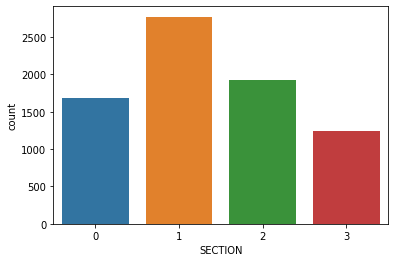

In [30]:
sns.countplot(df['SECTION'])

In [31]:
df['length']=df['STORY'].apply(len)

In [32]:
df['length'].describe()

count    7628.000000
mean      651.239381
std       521.631877
min       100.000000
25%       314.000000
50%       534.000000
75%       833.250000
max      6015.000000
Name: length, dtype: float64

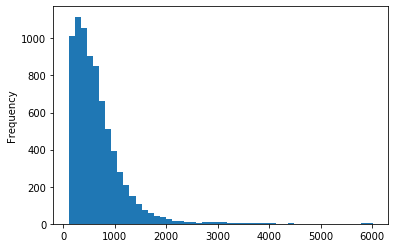

In [33]:
df['length'].plot(bins=50, kind='hist') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F77FA9488>,
      dtype=object)

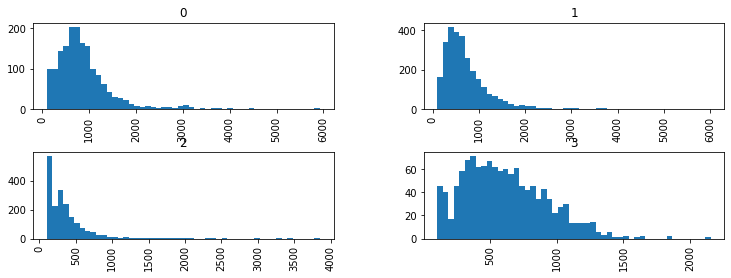

In [34]:
df.hist(column='length', by='SECTION', bins=50,figsize=(12,4))

In [5]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [9]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]
print(nopunc)
# Join the characters again to form the string.
nopunc = ''.join(nopunc)
print(nopunc)

['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']
Sample message Notice it has punctuation


In [6]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [38]:
# Check to make sure its working
df['STORY'].head(5).apply(text_process)

0    [painful, huge, reversal, fee, income, unheard...
1    [formidable, opposition, alliance, among, Cong...
2    [Asian, currencies, trading, lower, today, Sou...
3    [want, answer, question, click, ‘Answer’, clic...
4    [global, markets, gold, prices, edged, today, ...
Name: STORY, dtype: object

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['STORY'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))
bow_transformer1 = CountVectorizer(analyzer=text_process).fit(df1['STORY'])

48048


In [41]:
message4 = df['STORY'][3]
print(message4)

If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also check out replies of other users. Proceed to Answer either through writing or voice command.


If you want to ask any question, click on “Ask A Question". Few question prefixes are already inserted to help you with your questions. After submitting your question, the app will send the questions to your neighbours and will let you know how many neighbours


have been asked the question. Click Done. You can click on the bell icon on the homepage of the app to follow answers to your questions.


In [42]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4214)	2
  (0, 6478)	1
  (0, 7588)	1
  (0, 15423)	1
  (0, 15625)	1
  (0, 21310)	1
  (0, 21313)	1
  (0, 21516)	1
  (0, 21519)	1
  (0, 21638)	2
  (0, 21863)	1
  (0, 21864)	1
  (0, 22580)	1
  (0, 24047)	1
  (0, 24304)	3
  (0, 24307)	1
  (0, 24592)	1
  (0, 27591)	1
  (0, 29248)	1
  (0, 30658)	1
  (0, 30884)	1
  (0, 31180)	1
  (0, 31772)	1
  (0, 32509)	1
  (0, 32880)	1
  (0, 33564)	1
  (0, 34754)	2
  (0, 37010)	1
  (0, 37738)	5
  (0, 37744)	3
  (0, 38562)	1
  (0, 39799)	1
  (0, 41637)	1
  (0, 43900)	1
  (0, 44250)	1
  (0, 44376)	2
  (0, 44971)	1
  (0, 45197)	1
  (0, 45601)	1
(1, 48048)


In [11]:
messages_bow = bow_transformer.transform(df['STORY'])
messages_bow1 = bow_transformer1.transform(df1['STORY'])

In [18]:
print('Shape of Sparse Matrix: ', messages_bow1.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (2748, 28276)
Amount of Non-Zero occurences:  418294


In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_transformer1 = TfidfTransformer().fit(messages_bow1)


In [14]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
messages_tfidf1 = tfidf_transformer1.transform(messages_bow1)
print(messages_tfidf.shape)

(7628, 48048)


In [20]:
messages_tfidf1.shape

(2748, 28276)

In [15]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['SECTION'])


In [ ]:
all_predictions = spam_detect_model.predict(messages_tfidf)

print(all_predictions)

In [50]:
from sklearn.metrics import classification_report
print (classification_report(df['SECTION'], all_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1686
           1       0.95      1.00      0.97      2772
           2       1.00      0.95      0.98      1924
           3       1.00      0.95      0.97      1246

    accuracy                           0.97      7628
   macro avg       0.98      0.97      0.97      7628
weighted avg       0.97      0.97      0.97      7628



In [24]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [25]:
pipeline.fit(df['STORY'],df['SECTION'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000189E2CD8678>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [26]:
all_predictions1= pipeline.predict(df1['STORY'])

In [30]:
all_predictions1=all_predictions1.tolist()
all_predictions1

[1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 3,
 2,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 3,
 3,
 0,
 1,
 3,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 3,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 3,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 3,
 0,
 3,
 0,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 3,
 1,
 1,
 2,
 0,
 2,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 3,
 2,
 1,
 1,
 3,
 0,
 2,
 0,
 3,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 2,
 0,
 2,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 3,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 3,


In [40]:
pd.DataFrame(all_predictions1, columns = ['SECTION']).to_excel("E:\\News_Pred1.xlsx",index=False)